# Gaussian Naive Bayes
- It is a sub type of Naive Bayes theorem which works on gaussian theorem.
- The gaussian model assumes that features follow a normal distribution. 
- This means if predictors takes a contionous values instead of discrete, then the model assumes that these values are sampled from the gaussian distribution.

# Example of gaussian naive bayes

In [21]:
# some imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.naive_bayes import GaussianNB

In [22]:
# import our data
df = pd.read_csv("Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [23]:
x = df.iloc[:, [2,3]].values
y = df.iloc[:,4].values

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state = 0)

In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [26]:
model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

In [27]:
y_pred = model.predict(x_test)

In [28]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[73  6]
 [ 7 34]]


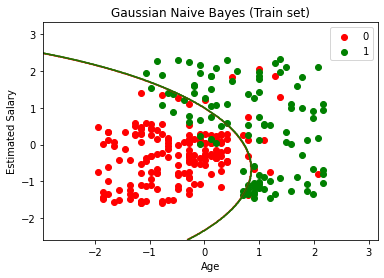

In [49]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start = x_set[:,0].min()-1,
                              stop = x_set[:,0].max()+1,
                              step = 0.01),
                   np.arange(start = x_set[:,1].min()-1,
                             stop = x_set[:,1].max()+1,
                             step = 0.01))
plt.contour(x1, x2, classifier.predict(np.array([x1.ravel(), 
                                                x2.ravel()]).T).reshape(x1.shape),
           alpha = 0.5,
           cmap = ListedColormap(('red','green')))

plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())

for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j,0],
               x_set[y_set == j, 1],
               color = ListedColormap(('red','green'))(i),label = j)

plt.title("Gaussian Naive Bayes (Train set)")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.legend()
plt.show()

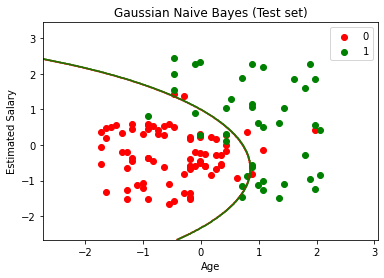

In [56]:
x_set, y_set = x_test, y_test
x1, x2 = np.meshgrid(np.arange(start = x_set[:,0].min()-1,
                              stop = x_set[:,0].max()+1,
                              step = 0.01),
                   np.arange(start = x_set[:,1].min()-1,
                             stop = x_set[:,1].max()+1,
                             step = 0.01))
plt.contour(x1, x2, 
            classifier.predict(
                np.array([x1.ravel(), 
                        x2.ravel()]).T).reshape(x1.shape),
           alpha = 0.50,
           cmap = ListedColormap(('red','green')))

plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())

for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j,0],
               x_set[y_set == j, 1],
               color = ListedColormap(('red','green'))(i),label = j)

plt.title("Gaussian Naive Bayes (Test set)")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.legend()
plt.show()